In [2]:
# Import libraries
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
#import xpress as xp
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
import folium
import osmnx as ox
import geopandas as gpd

/tmp/ipykernel_1893/1849620298.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.preprocessing import StandardScaler

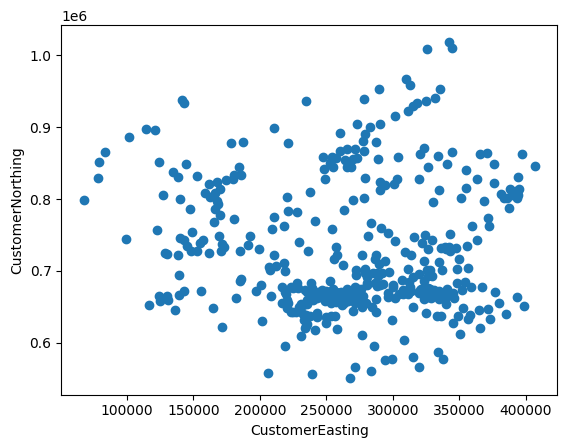

In [4]:
customer = pd.read_csv('CustomerId.csv').merge(pd.read_csv('CustomerNorthing.csv'), how='inner').merge(pd.read_csv('CustomerEasting.csv'), how='inner')

X = customer[['CustomerNorthing', 'CustomerEasting']].values  # Convert DataFrame to NumPy array

plt.scatter(X[:, 1], X[:, 0])  # Use array indexing for scatter plot
plt.xlabel('CustomerEasting')
plt.ylabel('CustomerNorthing')
plt.show()

Inertia with 5 clusters: 1166401418560.9067


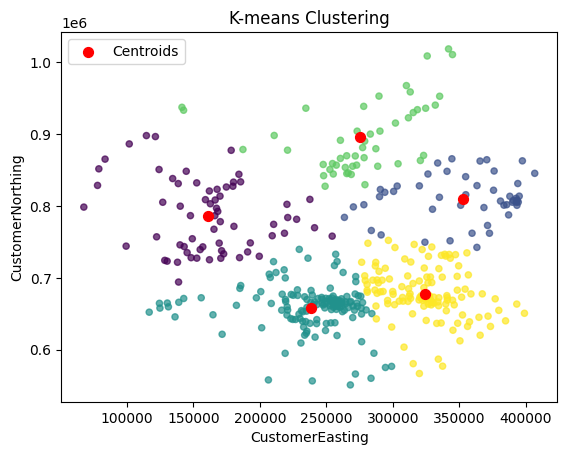

In [42]:
# Parameters for KMeans
init_method = 'random'
n_init = 1  # Number of times the algorithm is run with different random initializations
random_state = 2  # Fixed random seed

# Different values for n_clusters
n_clusters_list = [5]
# Part b
inertia_values = []

for n_clusters in n_clusters_list:
    # Create KMeans instance
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, n_init=n_init, random_state=random_state)

    # Fit the KMeans algorithm
    kmeans.fit(X)
    
    inertia = kmeans.inertia_
    
    inertia_values.append(inertia)

    print(f"Inertia with {n_clusters} clusters:", inertia)

    # Get cluster assignments and plot the results
    labels = kmeans.labels_

    plt.scatter(X[:, 1], X[:, 0], c=labels, s=20, alpha=0.7)  # Changed the order of coordinates for scatter plot
    plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='red', marker='.', s=200, label='Centroids')  # Changed the order of coordinates for centroids
    plt.title(f'K-means Clustering') # with {n_clusters} clusters')
    plt.xlabel('CustomerEasting')
    plt.ylabel('CustomerNorthing')
    plt.legend()
    plt.show()
    


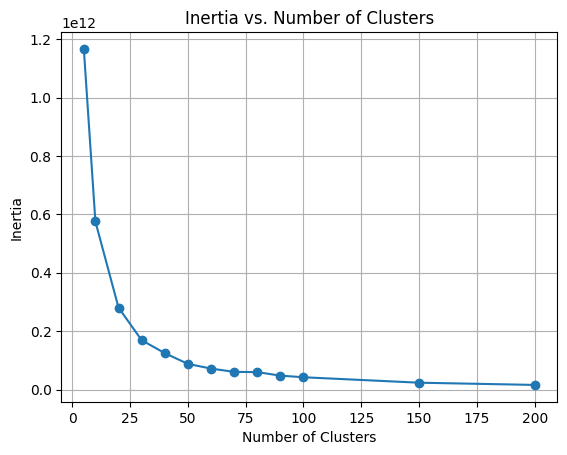

In [9]:
#to run, change cluster array above to n_clusters_list = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
plt.plot(n_clusters_list, inertia_values, marker='o')  # Plotting inertia values against number of clusters
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [40]:
closest_points = []

for cluster_idx in range(n_clusters):
    cluster_points = X[labels == cluster_idx]  # Select points belonging to current cluster
    centroid = kmeans.cluster_centers_[cluster_idx]  # Get centroid of current cluster
    
    # Calculate distances between points in cluster and centroid
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    
    # Find index of point closest to centroid
    closest_point_idx = np.argmin(distances)
    
    # Get coordinates of closest point
    closest_point_coords = cluster_points[closest_point_idx]
    
    # Append index and coordinates of closest point to list
    closest_points.append((closest_point_idx, closest_point_coords))

# Print out index and coordinates of closest points for each cluster
for i, (idx, coords) in enumerate(closest_points):
    print(f"Closest point to centroid of cluster {i}: Index={idx}, Coordinates={coords}")

Closest point to centroid of cluster 0: Index=44, Coordinates=[845124 265429]
Closest point to centroid of cluster 1: Index=136, Coordinates=[675056 274091]


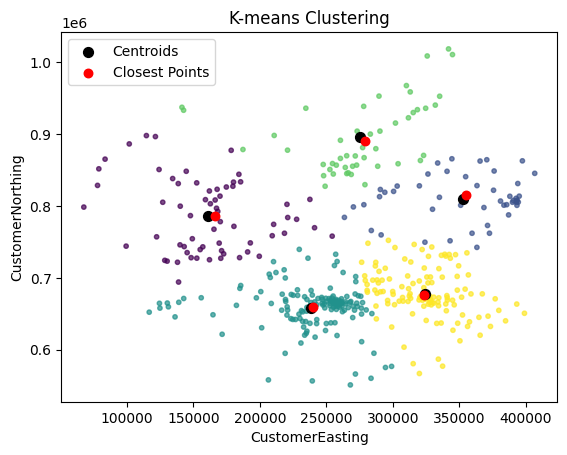

In [59]:
from matplotlib.colors import ListedColormap

closest_points = []

for cluster_idx in range(n_clusters):
    cluster_points = X[labels == cluster_idx]  # Select points belonging to current cluster
    centroid = kmeans.cluster_centers_[cluster_idx]  # Get centroid of current cluster
    
    # Calculate distances between points in cluster and centroid
    distances = np.linalg.norm(cluster_points - centroid, axis=1)
    
    # Find index of point closest to centroid
    closest_point_idx = np.argmin(distances)
    
    # Get coordinates of closest point
    closest_point_coords = cluster_points[closest_point_idx]
    
    # Append index and coordinates of closest point to list
    closest_points.append(closest_point_coords)

num_clusters = len(np.unique(labels))
colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))  # Using viridis colormap for shades of green
cmap = ListedColormap(colors)

# Plot the data points and centroids
plt.scatter(X[:, 1], X[:, 0], c=labels, s=10, alpha=0.7)  # Changed the order of coordinates for scatter plot
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], c='black', marker='.', s=200, label='Centroids')  # Changed the order of coordinates for centroids

# Plot the closest points
closest_points = np.array(closest_points)
plt.scatter(closest_points[:, 1], closest_points[:, 0], c='red', marker='.', s=150, label='Closest Points')  # Changed the order of coordinates for centroids

plt.title('K-means Clustering')
plt.xlabel('CustomerEasting')
plt.ylabel('CustomerNorthing')
plt.legend()
plt.show()

______________________________________________________--

-------------------------------------------------

In [7]:
from pyproj import CRS, Geod, Proj, transform
v84 = Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = Proj(proj="latlong", k=0.9996012717, ellps="airy",
        towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = Proj(init="world:bng")


def vectorized_convert(df,easting_file,northing_file):
    vlon36, vlat36 = vgrid(easting_file, 
                           northing_file, 
                           inverse=True)
    converted = transform(v36, v84, vlon36, vlat36)
    df['longitude'] = converted[0]
    df['latitude'] = converted[1]
    return df


# from: https://stackoverflow.com/questions/62019398/fast-conversion-of-easting-and-northing-to-latitude-and-longitude-for-a-large-da

/home/codespace/.python/current/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Customer

In [18]:
customer = pd.read_csv('CustomerId.csv').merge(pd.read_csv('CustomerNorthing.csv'), how='inner').merge(pd.read_csv('CustomerEasting.csv'), how='inner')
# customer.head()

easting_file = customer['CustomerEasting'].values
northing_file = customer['CustomerNorthing'].values

customer = vectorized_convert(customer,easting_file,northing_file)
#customer.head()

/tmp/ipykernel_4699/1301223978.py:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = transform(v36, v84, vlon36, vlat36)


Candidates

In [9]:
candidates = pd.read_csv('CandidateId.csv').merge(pd.read_csv('CandidateEasting.csv'), how='inner').merge(pd.read_csv('CandidateNorthing.csv'), how='inner').merge(pd.read_csv('Capacity.csv'), how='inner').merge(pd.read_csv('Setup.csv'), how='inner').merge(pd.read_csv('Operating.csv'), how='inner')

easting_file = candidates['CandidateEasting'].values
northing_file = candidates['CandidateNorthing'].values

candidates = vectorized_convert(candidates,easting_file,northing_file)

candidates.head()

/tmp/ipykernel_4699/1301223978.py:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = transform(v36, v84, vlon36, vlat36)


,Candidates,CandidateId,CandidateEasting,CandidateNorthing,Capacity,Setup,Operating,longitude,latitude
0,1,AB10,392949,805109,4320000,5424000,542400,-2.118129,57.136832
1,2,AB11,394404,805438,4360000,5312000,531200,-2.094098,57.139808
2,3,AB12,393407,800946,4720000,4388000,438800,-2.110451,57.099442
3,4,AB13,385705,801808,4760000,4318000,431800,-2.237621,57.107009
4,5,AB14,383616,801140,5040000,3716000,371600,-2.272063,57.100938


Suppliers

In [19]:
suppliers = pd.read_csv('SupplierId.csv').merge(pd.read_csv('SupplierEasting.csv'), how='inner').merge(pd.read_csv('SupplierNorthing.csv'), how='inner').merge(pd.read_csv('SupplierCapacity.csv'), how='inner').merge(pd.read_csv('SupplierProductGroup.csv'), how='inner').merge(pd.read_csv('SupplierVehicleType.csv'), how='inner')

easting_file = suppliers['SupplierEasting'].values
northing_file = suppliers['SupplierNorthing'].values

suppliers = vectorized_convert(suppliers,easting_file,northing_file)

#suppliers.head()

/tmp/ipykernel_4699/1301223978.py:12: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  converted = transform(v36, v84, vlon36, vlat36)


distance_district_district


In [15]:
# demand_coord = np.column_stack((np.array(customer_coordinates['CustomerEasting']),customer_coordinates['CustomerNorthing']))
# kmeans = KMeans(n_clusters= 10, init = 'random', n_init = 1, max_iter=300, random_state = 2)
# kmeans = kmeans.fit(demand_coord)

NameError: name 'customer_coordinates' is not defined

In [12]:
plt.scatter(demand_coord[:,0],demand_coord[:,1],c=kmeans.labels_)

NameError: name 'demand_coord' is not defined

### Variables definition
The variables are:

w -> candidate warehouse c -> customer t -> time period

$x_{w,c,t}$ : is a binary variable that is 1 if a customer is served by a candidate warehouse in period t


$y_{w,t}$ : is a binary variable that is 1 if a candidate warehouse operates in period t

$k_{w}$ : is a binary variable that is 1 if a candidate warehouse is set

$z_{w,s}$ : is a binary variable that is 1 if a warehouse recive products by supplier s

In [16]:
prob = xp.problem('tartan')

t = 10
x = {}
y = {}
z = {}
s = {}


for i in range(len(candidates)):
    for j in range(len(customer)):
        for k in range(t):
            namex = 'x_{0}_{1}_{2}'.format(candidates['CandidateId'][i],customer['CustomerId'][j],k)
            x[namex] = xp.var(vartype=xp.binary, name=namex)

for i in range(len(candidates)):
    for j in range(len(suppliers)):
        namez = 'z_{0}_{1}'.format(candidates['CandidateId'][i],suppliers['SupplierId'][j])
        z[namez] = xp.var(vartype=xp.binary, name=namez)

for i in range(len(candidates)):
    names = 's_{0}'.format(candidates['CandidateId'][i])
    s[names] = xp.var(vartype=xp.binary, name=names)
    for k in range(t):
        namey = 'y_{0}_{1}'.format(candidates['CandidateId'][i],k)
        y[namey] = xp.var(vartype=xp.binary, name=namey)

prob.addVariable(x,y,z,s)

NameError: name 'xp' is not defined

### Constraints
Eeach customer is served only by one warehouse
$\sum_{x \in X}x_{w,c,t} = 1, \forall c \in C, t \in T$

In [17]:
# Constraints
for j in range(len(customer)):
    for k in range(t):
        prob.addConstraint(
            sum(
                x['x_{0}_{1}_{2}'.format(candidates['CandidateId'][i],customer['CustomerId'][j],k)]
            for i in range(len(candidates))
            ) == 1
        )


NameError: name 't' is not defined

A customer only can be served by a warehouse if it is operating in this year $x_{w,c,t} \leq y_{w,t}, \forall w \in W, c \in C, t \in T$


In [ ]:
for i in range(len(candidates)):
    for j in range(len(customer)):
        for k in range(t):
            prob.addConstraint(
                x['x_{0}_{1}_{2}'.format(candidates['CandidateId'][i],customer['CustomerId'][j],k)] <= y['y_{0}_{1}'.format(candidates['CandidateId'][i],k)]
            )

To track if a warehouse is set in any year $\sum_{t \in T} y_{w,t} \leq Ts_{w}, \forall w \in W$

In [ ]:
for i in range(len(candidates)):
    prob.addConstraint(
        sum(
                y['y_{0}_{1}'.format(candidates['CandidateId'][i],k)]
            for k in range(t)
            ) <= t*s['s_{0}'.format(candidates['CandidateId'][i])]
    )

In [ ]:
cost_cand_cust = pd.read_csv('CostCandidateCustomers.csv')
cost_cand_cust = pd.merge(cost_cand_cust,candidates[['Candidates','CandidateId']],on="Candidates")
cost_cand_cust = pd.merge(cost_cand_cust,customer[['Customers','CustomerId']],on="Customers")
cost_cand_cust = cost_cand_cust.pivot(index='CandidateId', columns='CustomerId', values='CostCandidateCustomers')
cost_cand_cust

CustomerId,AB10,AB11,AB12,AB13,AB14,AB15,AB16,AB21,AB22,AB23,...,TD14,TD15,TD2,TD3,TD4,TD5,TD6,TD7,TD8,TD9
CandidateId,,,,,,,,,,,,,,,,,,,,,
AB10,0.000000,0.002142,0.006222,0.009153,0.015649,0.004062,0.005245,0.014072,0.010490,0.011415,...,0.299384,0.316182,0.257666,0.271926,0.270058,0.289906,0.277514,0.280119,0.295099,0.300961
AB11,0.002622,0.000000,0.007799,0.015563,0.017226,0.006273,0.006496,0.013969,0.007696,0.009941,...,0.300944,0.317758,0.259242,0.273503,0.271635,0.291483,0.279091,0.281696,0.296676,0.302538
AB12,0.006547,0.007524,0.000000,0.015135,0.016797,0.008810,0.009993,0.018837,0.015237,0.017140,...,0.294448,0.311245,0.252729,0.266990,0.265122,0.284987,0.272595,0.275183,0.290163,0.296042
AB13,0.009153,0.014895,0.015255,0.000000,0.004679,0.009427,0.014329,0.018751,0.022042,0.030852,...,0.297242,0.314056,0.255540,0.269801,0.267932,0.287781,0.275388,0.277994,0.292974,0.298836
AB14,0.015632,0.016592,0.016883,0.004679,0.000000,0.016352,0.015940,0.020362,0.023670,0.032480,...,0.298870,0.315685,0.257169,0.271412,0.269561,0.289409,0.277017,0.279622,0.294585,0.300464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TD5,0.289769,0.290729,0.284867,0.287592,0.289255,0.292031,0.293214,0.300876,0.298459,0.300361,...,0.049706,0.038994,0.033389,0.020002,0.022471,0.000000,0.023122,0.036080,0.020020,0.038634
TD6,0.278199,0.279176,0.273297,0.276023,0.277685,0.280462,0.281644,0.289306,0.286889,0.288792,...,0.065321,0.060744,0.020722,0.022111,0.008673,0.023156,0.000000,0.018014,0.021116,0.030115
TD7,0.280736,0.281713,0.275851,0.278559,0.280239,0.283016,0.284198,0.291860,0.289443,0.291346,...,0.078947,0.072468,0.034297,0.037965,0.024510,0.035531,0.017449,0.000000,0.033474,0.025144


In [ ]:
prob.setObjective(
        xp.Sum(cost_cand_cust[i][j]*x['x_{0}_{1}_{2}'.format(i,j,k)]
        for i in candidates['CandidateId'] for j in customer['CustomerId'] for k in range(t))
        + xp.Sum(candidates.loc[candidates['CandidateId']==i,'Setup'].values*s['s_{0}'.format(i)]
        for i in candidates['CandidateId'])
        ,sense = xp.minimize)

In [ ]:
# prob.write('reg','lp')

prob.solve()

FICO Xpress v9.2.2, Hyper, solve started 0:55:17, Feb 14, 2024
Heap usage: 1090MB (peak 2502MB, 353MB system)
Minimizing MILP noname using up to 8 threads and up to 23GB memory, with these control settings:
OUTPUTLOG = 1
Original problem has:
   1941280 rows      1964160 cols      5817680 elements   1964160 entities
Presolved problem has:
   1940400 rows      1936440 cols      5808000 elements   1936440 entities
Presolve finished in 62 seconds
Heap usage: 1746MB (peak 2502MB, 353MB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  1.00e+01] / [ 1.00e+00,  1.00e+00]
  RHS and bounds [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  Objective      [min,max] : [ 5.14e-04,  6.25e+06] / [ 5.14e-04,  6.25e+06]
Autoscaling applied standard scaling

Will try to keep branch and bound tree memory usage below 5.1GB
Starting concurrent solve with dual (1 thread) and barrier (7 threads)

              Concurre

(<SolveStatus.COMPLETED: 3>, <SolStatus.OPTIMAL: 1>)

In [ ]:
prob.getObjVal()

625863.49335

In [ ]:
prob.getSolution(y).items

<function dict.items>

In [ ]:
filtered_dict = {key: value for key, value in prob.getSolution(y).items() if value > 0}
filtered_dict

{'y_PH17_0': 1.0,
 'y_PH17_1': 1.0,
 'y_PH17_2': 1.0,
 'y_PH17_3': 1.0,
 'y_PH17_4': 1.0,
 'y_PH17_5': 1.0,
 'y_PH17_6': 1.0,
 'y_PH17_7': 1.0,
 'y_PH17_8': 1.0,
 'y_PH17_9': 1.0}

In [ ]:
from pyproj import CRS, Geod, Proj, transform
v84 = Proj(proj="latlong",towgs84="0,0,0",ellps="WGS84")
v36 = Proj(proj="latlong", k=0.9996012717, ellps="airy",
        towgs84="446.448,-125.157,542.060,0.1502,0.2470,0.8421,-20.4894")
vgrid = Proj(init="world:bng")

def vectorized_convert(df):
    vlon36, vlat36 = vgrid(pd.read_csv('SupplierEasting.csv').values[:,1], 
                           pd.read_csv('SupplierNorthing.csv').values[:,1], 
                           inverse=True)
    converted = transform(v36, v84, vlon36, vlat36)
    df['longitude'] = converted[0]
    df['latitude'] = converted[1]
    return df

df = pd.DataFrame(pd.read_csv('SupplierEasting.csv').values[:,1],
                   pd.read_csv('SupplierNorthing.csv').values[:,1])

print(vectorized_convert(df))


# from: https://stackoverflow.com/questions/62019398/fast-conversion-of-easting-and-northing-to-latitude-and-longitude-for-a-large-da

,0,longitude,latitude
823186,165124,-5.894144,57.238907
712442,218457,-4.933282,56.269642
777690,166352,-5.831583,56.831762
797391,370643,-2.485744,57.066614
687436,241260,-4.550559,56.053375
607916,307598,-3.459005,55.356534
741339,365265,-2.566770,56.562721
656828,393634,-2.103127,55.804689
722990,301473,-3.597465,56.388875
691342,322640,-3.245456,56.108550


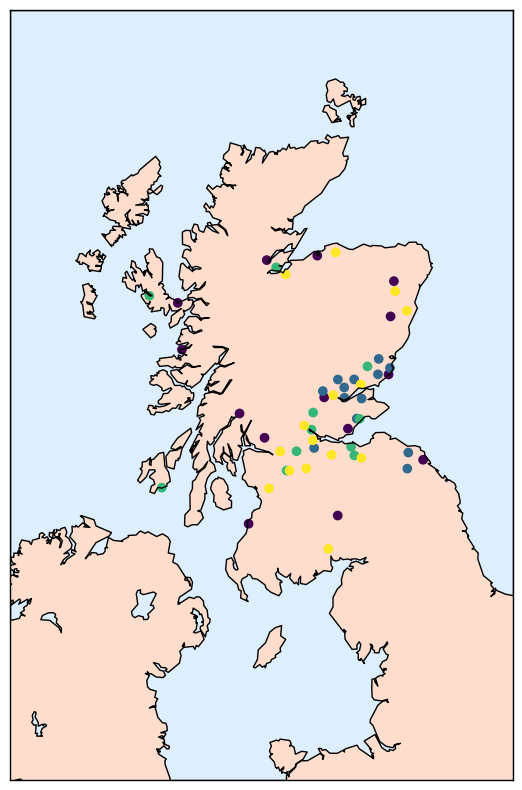

In [ ]:
plt.figure(figsize=(10, 10))
a = 2
m = Basemap(projection='gnom', lat_0=57, lon_0=-6.2,
                width=3E6, height=2E6, resolution='i',
                 llcrnrlon=df['longitude'].min()-a, llcrnrlat=df['latitude'].min()-a, urcrnrlon=df['longitude'].max()+a, urcrnrlat=df['latitude'].max()+a)
m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
m.drawmapboundary(fill_color="#DDEEFF")
m.drawcoastlines()
# m.shadedrelief(scale=0.9)
scatter = m.scatter(df['longitude'], df['latitude'], latlon=True,c=pd.read_csv('SupplierProductGroup.csv')['SupplierProductGroup'])



# plt.scatter(x = df['longitude'],y = df['latitude'])
plt.show()

<Axes: >

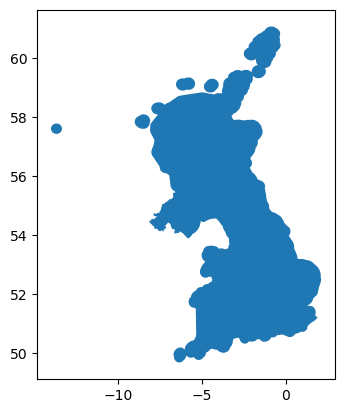

In [ ]:
place_name = "United Kingdom"
import osmnx as ox
import geopandas as gpd

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)
area
area.plot()